## Задача 2

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
np.seterr(divide='ignore'); # forgive me..
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['figure.dpi'] = 100

### Equation of the form f(E)=0, where E is energy in main state for the problem where the particle is in a rectangular potential well of size [-a, a] and potential -|U0|

In [143]:
a = 5
U0 = 6
E0 = -0.95
precision=10e-9

In [144]:
def f(E):
    return (1/np.tan(np.sqrt(2 * a * a * U0 * (1 + E/U0)))) - np.sqrt((-U0/E) - 1) 

In [145]:
def df(E):
    return - (a ** 2) / ((np.sin(np.sqrt(2 * a * a * U0 * (1 + E/U0))) ** 2) * np.sqrt(2 * a * a * U0 * (1 + E/U0)))\
           - (U0/2)/(E**2*((-U0/E) - 1))      

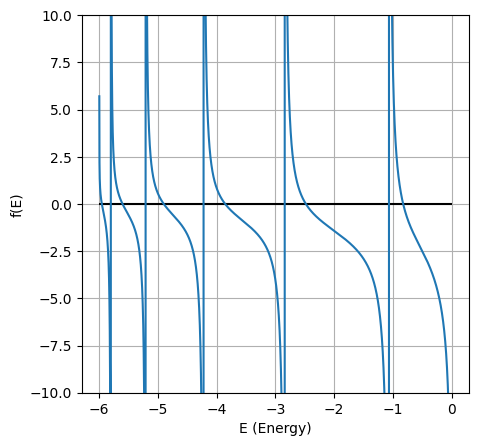

In [146]:
dom = np.linspace(-U0, -0.0, 10000)
val = f(dom)
plt.xlabel("E (Energy)")
plt.ylabel("f(E)")
plt.ylim([-10, 10])
plt.hlines(0, xmin=-U0, xmax=0, colors='k')
plt.plot(dom, val)
plt.grid()
plt.show()

# Dichotomy

In [147]:
def dichotomy(a, b, error=precision):
    middle = (a + b) / 2
    curError = (b - a) / 2
    if curError < error:
        return middle
    return dichotomy(a, middle) if f(middle) * f(a) <= 0 else dichotomy(middle, b)

In [156]:
%%time
# Энергия основного состояния будет в промежутке от (-U0, -U0 + h)
h = 0.01
left = -U0
right = -U0 + h
while f(left) * f(right) >= 0:
    left += h
    right += h
dichotomyRoot = dichotomy(left, right)
print('Dichotomy root: {}'.format(dichotomyRoot))
print('f({}) = {}'.format(dichotomyRoot, f(dichotomyRoot)))

Dichotomy root: -5.955898065567018
f(-5.955898065567018) = 1.2068173822765704e-07
CPU times: user 940 µs, sys: 222 µs, total: 1.16 ms
Wall time: 1.52 ms


which almost zero :)

# Fixed Point Iteration

### let our $x_0$ (estimation to original root $x^*$) will be Dichotomy root, so...

In [149]:
_lambda = 1 / df(dichotomyRoot)
def fixedPointIteration(x, error=precision):
    value = - _lambda * f(x)
    curError = np.abs(dichotomyRoot - x)
    return fixedPointIteration(x + value) if curError > error else x

In [154]:
%%time
fixPointIterRoot = fixedPointIteration(left)
print('Fixed Point Iteration root: {}'.format(fixPointIterRoot))
print('f({}) = {}'.format(fixPointIterRoot, f(fixPointIterRoot)))

Fixed Point Iteration root: -5.955898067336362
f(-5.955898067336362) = 1.5242904950751868e-07
CPU times: user 718 µs, sys: 231 µs, total: 949 µs
Wall time: 849 µs


# Newton's Method

In [151]:
def Newton(x, error=precision):
    value = f(x) / df(x)
    curError = np.abs(fixPointIterRoot - x)
    return Newton(x - value) if curError > error else x

In [155]:
%%time
newtonRoot = Newton(left)
print('Newton\'s root: {}'.format(newtonRoot))
print('f({}) = {}'.format(newtonRoot, f(newtonRoot)))

Newton's root: -5.955898069302675
f(-5.955898069302675) = 1.877105755831998e-07
CPU times: user 1.95 ms, sys: 628 µs, total: 2.58 ms
Wall time: 5.48 ms
